<a href="https://www.kaggle.com/code/santiagojaramilloc/supply-chain-data?scriptVersionId=200744167" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supply-chain-analysis/supply_chain_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/supply-chain-analysis/supply_chain_data.csv')

In [3]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
df.isnull().sum()


Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [5]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


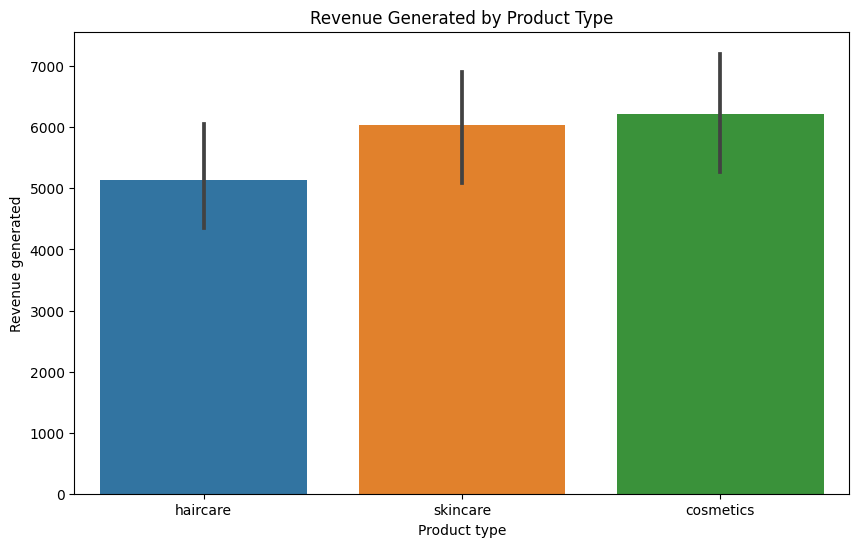

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x='Product type', y='Revenue generated', data=df)
plt.title('Revenue Generated by Product Type')
plt.show()


In [7]:
df['Total Cost'] = df['Costs'] + df['Manufacturing costs']

In [20]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_df.corr()

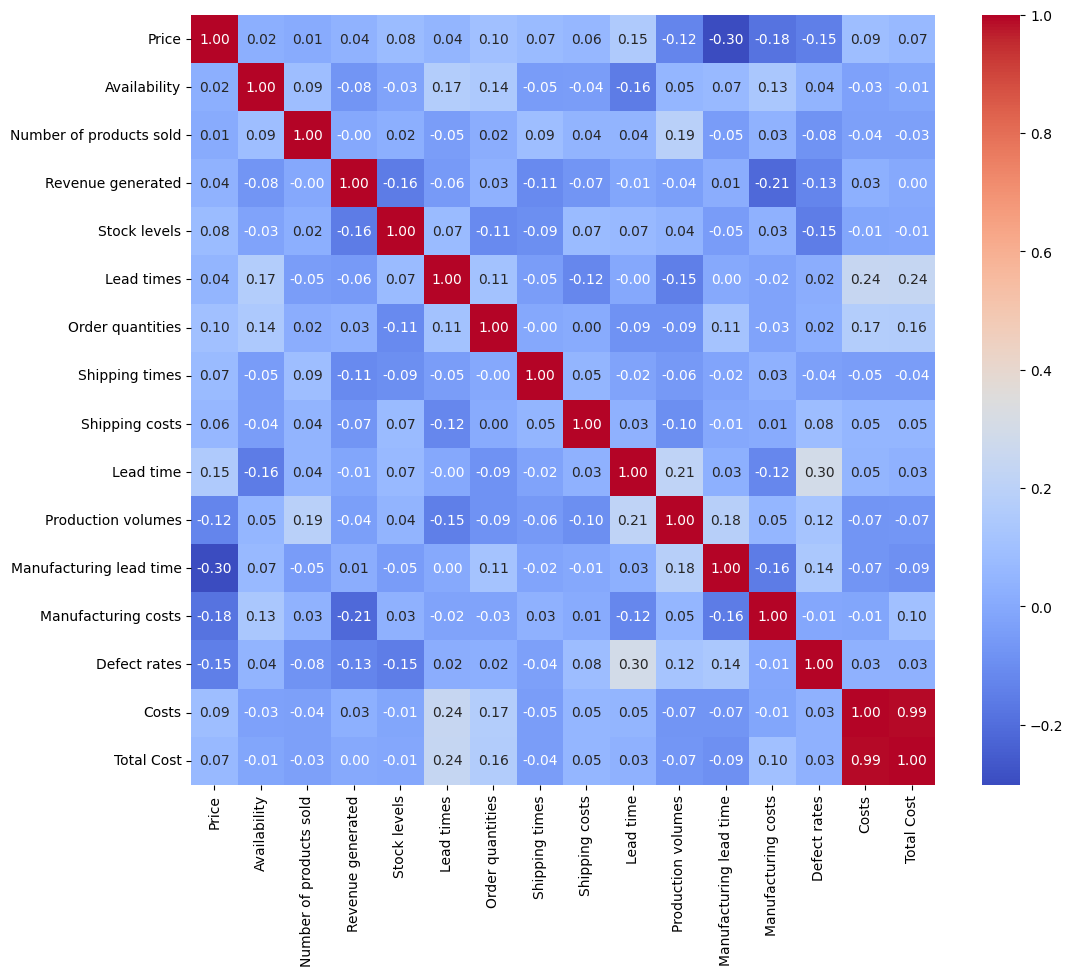

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


## Summary of Key Insights

### 1 Defect Rates, Manufacturing Lead Time, and Overall Lead Time

- **Manufacturing Lead Time and Defect Rates**: The correlation is weak (0.14), indicating that longer manufacturing times have some impact on defect rates, but it's not a strong relationship.
- **Overall Lead Time and Defect Rates**: The moderate positive correlation (0.30) suggests that the total time from production to delivery has a larger impact on defect rates than manufacturing time alone.
- **Actionable Insight**: To reduce defect rates, focus on improving the entire lead time process, particularly non-manufacturing factors such as transportation, storage, and handling, which may be contributing more to defects than delays in production.


### 2 Lead Times and Order Quantities
- **Lead times** and **Order quantities** have a very weak negative correlation, suggesting that larger order quantities have a minimal impact on reducing lead times.
- **Conclusion**: Order quantities are not a major factor affecting lead times in this dataset.


### 3. Production Volumes and Number of Products Sold
- There is a moderate positive correlation between **Production volumes** and the **Number of products sold**. This suggests that, generally, as production increases, the number of products sold also increases, although the relationship is not very strong.
- **Actionable Insight**: Ensure that production volumes are aligned with demand (number of products sold) to avoid overproduction or stock shortages.


In [12]:
customer_segments = df.groupby('Customer demographics')['Revenue generated'].mean()
print(customer_segments)


Customer demographics
Female        6460.579565
Male          6030.209250
Non-binary    5059.382675
Unknown       5583.552704
Name: Revenue generated, dtype: float64


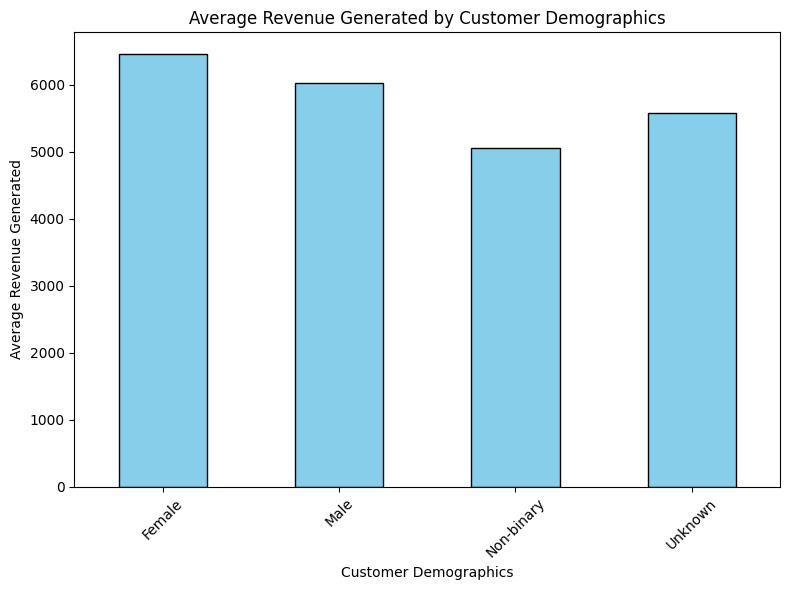

In [13]:

plt.figure(figsize=(8, 6))
customer_segments.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Revenue Generated by Customer Demographics')
plt.xlabel('Customer Demographics')
plt.ylabel('Average Revenue Generated')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

In [14]:
from scipy import stats

group1 = df[df['Transportation modes'] == 'Road']['Lead times']
group2 = df[df['Transportation modes'] == 'Air']['Lead times']

t_stat, p_value = stats.ttest_ind(group1, group2)
print(f'T-test statistic: {t_stat}, p-value: {p_value}')


T-test statistic: -0.4644649182231594, p-value: 0.6442170733331962


### T-test Results Interpretation

1. **T-test statistic (-0.464)**: 
   - This measures the difference between the means of the two groups (lead times for 'Road' and 'Air' transportation modes) relative to the variability in the data. 
   - A negative value indicates that the mean of `group1` (Road) is slightly less than the mean of `group2` (Air), but the value is small, meaning the difference between the two groups is not large.

2. **P-value (0.644)**: 
   - This represents the probability of observing the data, or something more extreme, assuming the null hypothesis (no difference between the means of the two groups) is true. 

### Conclusion:
- Since the p-value (0.644) is much higher than the typical significance level of 0.05, we **fail to reject the null hypothesis**. 
- This means there is **no statistically significant difference** between the lead times for Road and Air transportation modes based on the data provided.

In summary, the T-test suggests that the lead times for Road and Air transportation modes are not significantly different.


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features: Shipping Times, Manufacturing Costs, Stock Levels
X = df[['Shipping times', 'Manufacturing costs', 'Stock levels']]  # Feature set
y = df['Number of products sold']  # Target variable (Number of products sold)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Coefficients: This will show how much 'Shipping Times' affects sales
print("Coefficients:", model.coef_)


Mean Squared Error: 103641.56220117571
Coefficients: [ 9.66588382 -0.32140315  1.02815991]


In [ ]:
### Executive Summary: Impact of Shipping Times, Manufacturing Costs, and Stock Levels on Sales

#### Model Performance and Limitations:
- **Model Accuracy**: The current model's **Mean Squared Error (MSE)** is **103,641.56**, indicating a notable difference between the predicted and actual sales.
- **Key Insight**: While the model provides useful insights, its performance is **not optimal**. This is likely due to a **limited dataset** and potentially missing key variables that could improve accuracy.
   - **Business Implication**: The findings should be interpreted as **preliminary insights**, and further refinement of the model—using a larger or more detailed dataset—could lead to more accurate predictions.

#### Key Findings:
1. **Shipping Times**:
   - **Insight**: Shipping times have a **negative impact** on sales.
   - **Explanation**: For every 1-day increase in shipping time, the number of products sold decreases by approximately **0.32 units**.
   - **Business Implication**: **Reducing shipping times** can directly increase sales. Faster delivery could lead to more satisfied customers and higher sales volumes.

2. **Manufacturing Costs**:
   - **Insight**: Surprisingly, **higher manufacturing costs** are associated with an increase in sales.
   - **Explanation**: For every $1 increase in manufacturing costs, the number of products sold increases by about **9.67 units**.
   - **Business Implication**: This could indicate that higher manufacturing costs might be tied to higher-quality products or premium offerings, which drive more sales. We should evaluate if investing in higher-quality materials or processes could lead to higher demand and customer satisfaction.

3. **Stock Levels**:
   - **Insight**: Stock levels positively affect sales.
   - **Explanation**: For every unit increase in stock availability, sales increase by **1.03 units**.
   - **Business Implication**: Ensuring optimal stock levels is crucial for meeting customer demand. Stockouts may result in lost sales opportunities, while having more products available supports higher sales volumes.

#### Actionable Recommendations:
1. **Reduce Shipping Times**: Implement measures to optimize logistics and reduce shipping durations to improve customer satisfaction and boost sales.
2. **Evaluate Manufacturing Costs**: Analyze whether increasing manufacturing costs (for example, by using higher-quality materials) could further enhance product appeal and drive higher sales.
3. **Optimize Stock Levels**: Ensure that inventory is well-managed to meet demand, particularly during peak seasons, to avoid stockouts and lost sales opportunities.
